# Dark matter substructure model:

In [1]:
from subhalos_latest2 import *

plt.rc('font', **{'family':'sans-serif','size':15})
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 2
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.size'] = 2
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

In [2]:
path = "data/01/"
data_cat = ["m0","ct0","rs0","rhos0","r","weight","survive","rs_a","rhos_a"]

In [3]:
def haloloader(index,data_cat,path=path,z_min=0.2):
    halo = {" " : " "}
    cond = np.loadtxt(path+"zacc_"+str(index)+".txt")
    for i in data_cat:
        data = np.loadtxt(path+i+"_"+str(index)+".txt")
        halo[i] = data[cond>z_min]
    return halo

halos_av = haloloader(1,data_cat)
halos_2 = haloloader(2,data_cat)
halos_3 = haloloader(3,data_cat)
halos_4 = haloloader(4,data_cat)
halos_toy = haloloader(5,data_cat)

In [12]:
#Calculation of scale and virial radius of the host halo for z=redshift and mass=M0.
M0 = 1e12
redshift = 0
logr = True
rmin = 0.001
c = c_from_Mvir(Mvir=M0*Msolar,z=redshift)
Oz = Omegaz(pOmega,redshift)
rvir = (3.*M0*Msolar/(4.*np.pi*rhocrit(redshift)*Delc(Oz-1)))**(1./3.)
rs = rvir/c

def mass_selection(m_min,m_max,m0):
    mass_range_low=m0>(m_min*Msolar)
    mass_range_high=m0<(m_max*Msolar)
    return mass_range_low*mass_range_high

In [5]:
import scipy.integrate as spint
def mass_fraction(mass,weight ,Mhost=M0):
    Mhost=Mhost*Msolar
    fsh = np.sum(mass*weight)/Mhost
    return fsh


## Dark Matter Annihilation Boost Factor:

In [6]:
def annihilation_boost_factor(rhos0,rs0,ct0,mass,weight,Mhost=M0,redshift=0):    
    fsh = mass_fraction(mass=mass,weight=weight ,Mhost=M0)
    
    Lsh = np.sum(rhos0**2*rs0**3*(1.-1./(1.+ct0)**3)*weight)
    Mhost=Msolar*Mhost
    r200_host = (3.*Mhost/(4.*np.pi*rhocrit(redshift)*200.))**(1./3.)
    c200_host = conc200(Mhost,redshift)
    rs_host   = r200_host/c200_host
    rhos_host = Mhost/(4.*np.pi*rs_host**3*fc(c200_host))
    Lhost0    = rhos_host**2*rs_host**3*(1.-1./(1.+c200_host)**3)
    Bsh = Lsh/Lhost0
    luminosity_ratio = 1.-fsh**2+Bsh
    return Bsh, luminosity_ratio

In [7]:
print("Boost factor for model without spatial information:",
    annihilation_boost_factor(rhos0=halos_av['rhos0'],rs0=halos_av['rs0'],
                              ct0=halos_av['ct0'],mass=halos_av['m0'],weight=halos_av['weight'])[0])

print("Boost factor for toy model case:",
    annihilation_boost_factor(rhos0=halos_toy['rhos0'],rs0=halos_toy['rs0'],
                              ct0=halos_toy['ct0'],mass=halos_toy['m0'],weight=halos_toy['weight'])[0])

print("Boost factor for model 4 case:",
    annihilation_boost_factor(rhos0=halos_4['rhos0'],rs0=halos_4['rs0'],
                              ct0=halos_4['ct0'],mass=halos_4['m0'],weight=halos_4['weight'])[0])

print("Boost factor for model 2 case:",
    annihilation_boost_factor(rhos0=halos_2['rhos0'],rs0=halos_2['rs0'],
                              ct0=halos_2['ct0'],mass=halos_2['m0'],weight=halos_2['weight'])[0])

print("Boost factor for model 3 case:",
    annihilation_boost_factor(rhos0=halos_3['rhos0'],rs0=halos_3['rs0'],
                              ct0=halos_3['ct0'],mass=halos_3['m0'],weight=halos_3['weight'])[0])

Boost factor for model without spatial information: 1.4875781202027427
Boost factor for toy model case: 2.3663598822315612
Boost factor for model 4 case: 1.1738644001866954
Boost factor for model 2 case: 1.6924176652361025
Boost factor for model 3 case: 1.264749113194261


In [16]:
rmin = 0.0001
N_r = 100
def annihilation_boost_factor_dist(r,rhos0,rs0,ct0,mass,weight,rmin=rmin,N_r=N_r,logr=logr,
                                   Mhost=M0,redshift=0):    
    
    fsh = mass_fraction(mass=mass,weight=weight ,Mhost=M0)
    if logr==True:
        bins=np.logspace(np.log10(rmin),0,N_r+1)
    else:
        bins=np.linspace(rmin,1,N_r+1)
    
    
    Lsh = rhos0**2*rs0**3*(1.-1./(1.+ct0)**3)*weight

    #Mhost     = Mzi(Mhost,redshift)
    Mhost=Msolar*Mhost
    r200_host = (3.*Mhost/(4.*np.pi*rhocrit(redshift)*200.))**(1./3.)
    c200_host = conc200(Mhost,redshift)
    rs_host   = r200_host/c200_host
    rhos_host = Mhost/(4.*np.pi*rs_host**3*fc(c200_host))
    Lhost0    = rhos_host**2*rs_host**3*(1.-1./(1.+c200_host)**3)
    Bsh = Lsh/Lhost0
    luminosity_ratio = 1.-fsh**2+Bsh
    Boost,distance_edge =np.histogram(r,weights=Bsh,bins=bins)
    distance = (distance_edge[1:]+distance_edge[:-1])/2

    return Boost, distance




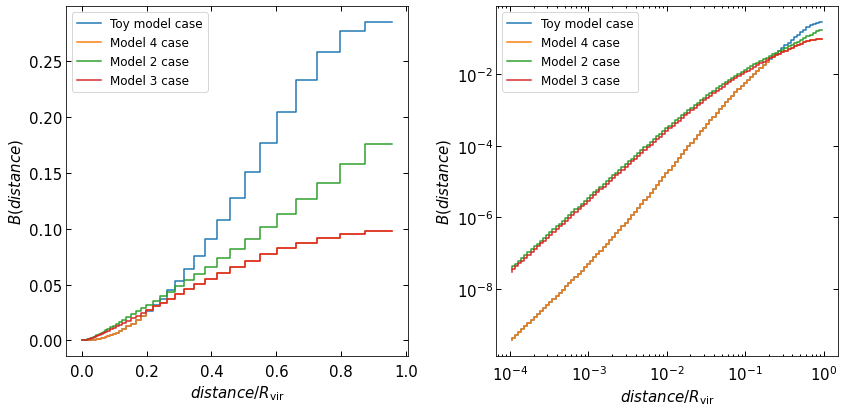

In [17]:
Boost_toy,distance_toy = annihilation_boost_factor_dist(r=halos_toy['r'],rhos0=halos_toy['rhos0'], \
                    rs0=halos_toy['rs0'],rmin=rmin,N_r=N_r,logr=logr,ct0=halos_toy['ct0'],mass=halos_toy['m0'],\
                                                        weight=halos_toy['weight'])

Boost_4,distance_4 = annihilation_boost_factor_dist(r=halos_4['r'],rhos0=halos_4['rhos0'],rs0=halos_4['rs0'], \
                        rmin=rmin,N_r=N_r,logr=logr,ct0=halos_4['ct0'],mass=halos_4['m0'],weight=halos_4['weight'])

Boost_2,distance_2 = annihilation_boost_factor_dist(r=halos_2['r'],rhos0=halos_2['rhos0'],rs0=halos_2['rs0'], \
                        rmin=rmin,N_r=N_r,logr=logr,ct0=halos_2['ct0'],
                                                    mass=halos_2['m0'],weight=halos_2['weight'])

Boost_3,distance_3 = annihilation_boost_factor_dist(r=halos_3['r'],rhos0=halos_3['rhos0'],rs0=halos_3['rs0'], \
                        rmin=rmin,N_r=N_r,logr=logr,ct0=halos_3['ct0'],mass=halos_3['m0'],weight=halos_3['weight'])


if logr==True:
    bins=np.logspace(np.log10(rmin),0,N_r+1)
else:
    bins=np.linspace(rmin,1,N_r+1)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
for ax in (ax1,ax2):
    ax.step(distance_toy,Boost_toy)
    ax.step(distance_4,Boost_4)
    ax.step(distance_2,Boost_2)
    ax.step(distance_3,Boost_3)
    #ax.set_title("Boost factor at diferrent distance",fontsize=12)
    ax.legend(['Toy model case','Model 4 case','Model 2 case','Model 3 case'],fontsize=12)
    ax.set_xlabel(r'$distance /R_{\rm vir}$')
    ax.set_ylabel(r'$B(distance)$')

ax2.set_xscale('log')
ax2.set_yscale('log')
plt.tight_layout()
#plt.savefig('boost_f_comp_toy_4_02.png')
plt.show()

## Fitting the boost factor at large distance values:

In [202]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import scipy.optimize as spopt
import scipy.integrate as spint
import scipy.interpolate as spinterp


def fiting(function,p0,d,B):
    ml_cfpars, ml_cfcovar = spopt.curve_fit(function,d,B,p0)
    model_ens = np.linspace(0,1,1000)
    fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,6),sharex=True,gridspec_kw={'height_ratios':[2,1]})
    fig.subplots_adjust(hspace=0)
    ax1.scatter(d,B, marker="o")
    # Plot the model as a continuous curve    
    ax1.plot(model_ens, function(model_ens,*ml_cfpars), lw=2)
    ax1.set_ylabel("Boost Factor", fontsize=12)
    ax1.tick_params(labelsize=14)

    ax2.scatter(d,function(d,*ml_cfpars)/B,marker="o")
    ax2.set_xlabel(r'$\frac{distance}{R_{vir}}$',fontsize=16)
    ax2.set_ylabel("model/data", fontsize=12)
    ax2.axhline(1.0, color='r', linestyle='dotted', lw=2) 
    plt.show()
    return ml_cfpars

def pol_4(x,*par):
    return par[4]*x**4+par[3]*x**3+par[2]*x**2+par[1]*x+par[0]

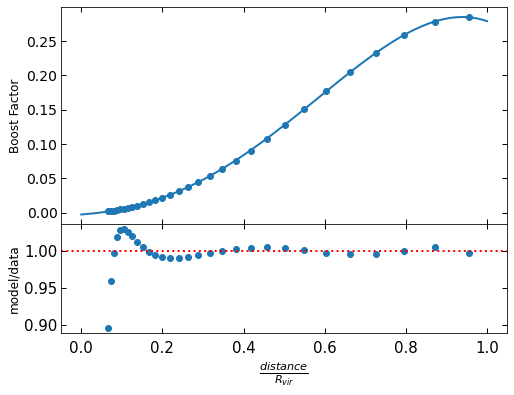

Boost factor of toy model: 0.13 *x^4 + -0.3 *x^3 0.14 *x^2 0.14 *x -0.01


In [225]:
p0=[1.4,-1.6,0.07,1.2,-1.36]
parameters_1=fiting(pol_4,p0,distance_toy[70:],Boost_toy[70:])
print("Boost factor of toy model:",round(parameters_2[4],2),"*x^4",
      "+",round(parameters_2[3],2),"*x^3",round(parameters_2[2],2),"*x^2",
      round(parameters_2[1],2),"*x",round(parameters_2[0],2))

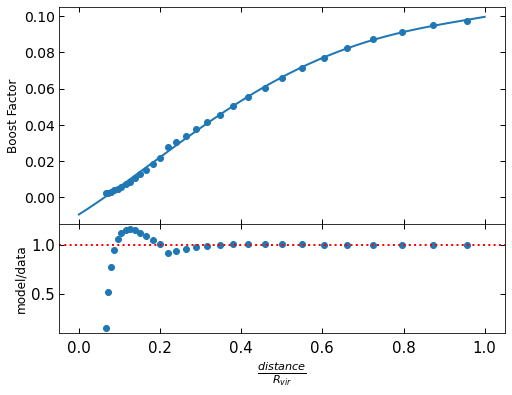

Boost factor of model 4: 0.13 *x^4 + -0.3 *x^3 0.14 *x^2 0.14 *x -0.01


In [224]:
p0=[1.4,-1.6,0.07,1.2,-1.36]
parameters_2=fiting(pol_4,p0,distance_4[70:],Boost_4[70:])
print("Boost factor of model 4:",round(parameters_2[4],2),"*x^4",
      "+",round(parameters_2[3],2),"*x^3",round(parameters_2[2],2),"*x^2",
      round(parameters_2[1],2),"*x",round(parameters_2[0],2))

## Fitting the boost factor at small distance values (log fitting):

In [213]:
def logf(x,*par):
    return par[1]*x+par[0]

def fiting_log(function,p0,d,B):
    ml_cfpars, ml_cfcovar = spopt.curve_fit(function,d,B,p0)
    model_ens = np.linspace(-4,-1,1000)
    fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,6),sharex=True,gridspec_kw={'height_ratios':[2,1]})
    fig.subplots_adjust(hspace=0)
    ax1.scatter(d,B, marker="o")
    # Plot the model as a continuous curve    
    ax1.plot(model_ens, function(model_ens,*ml_cfpars), lw=2)
    ax1.set_ylabel("Boost Factor", fontsize=12)
    ax1.tick_params(labelsize=14)

    ax2.scatter(d,function(d,*ml_cfpars)/B,marker="o")
    ax2.set_xlabel(r'$\frac{distance}{R_{vir}}$',fontsize=16)
    ax2.set_ylabel("model/data", fontsize=12)
    ax2.axhline(1.0, color='r', linestyle='dotted', lw=2) 
    plt.show()
    return ml_cfpars

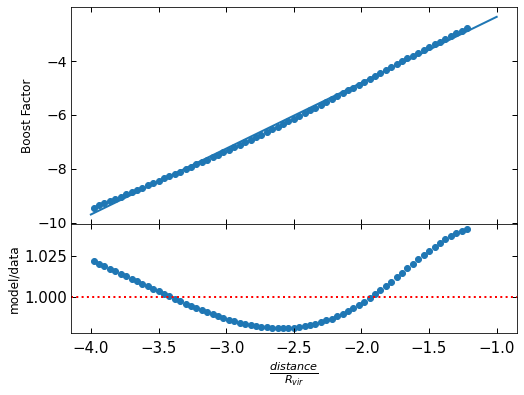

Boost factor of model 4 at small distance: 10^(x* 2.44 + 0.08 )


In [217]:
p0=[1.4,-1.6]
parameters_3=fiting_log(logf,p0,np.log10(distance_4[:70]),np.log10(Boost_4[:70]))
print("Boost factor of model 4 at small distance:","10^(x*",round(parameters_3[1],2),
      "+",round(parameters_3[0],2),")")

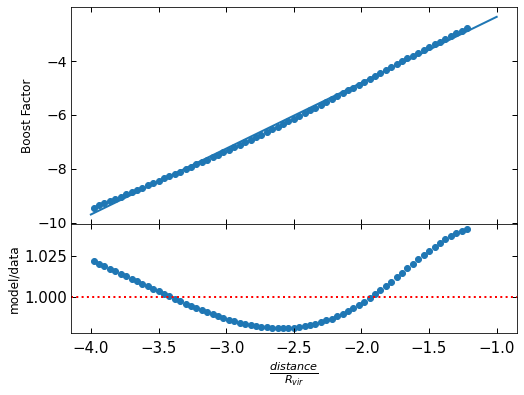

Boost factor of toy model at small distance: 10^(x* 2.44 + 0.08 )


In [218]:
p0=[1.4,-1.6]
parameters_4=fiting_log(logf,p0,np.log10(distance_toy[:70]),np.log10(Boost_toy[:70]))
print("Boost factor of toy model at small distance:","10^(x*",round(parameters_4[1],2),
      "+",round(parameters_4[0],2),")")

## Surface Brightness:

In [18]:
def substr_surf_brightness(r,rhos0,rs0,ct0,mass,weight,rmin=rmin,N_r=N_r,logr=logr,
                           Mhost=M0,redshift=0):    
    fsh = mass_fraction(mass=mass,weight=weight ,Mhost=M0)
    
    Lsh = rhos0**2*rs0**3*(1.-1./(1.+ct0)**3)*weight
    Mhost=Msolar*Mhost
    r200_host = (3.*Mhost/(4.*np.pi*rhocrit(redshift)*200.))**(1./3.)
    c200_host = conc200(Mhost,redshift)
    rs_host   = r200_host/c200_host
    rhos_host = Mhost/(4.*np.pi*rs_host**3*fc(c200_host))
    Lhost0    = rhos_host**2*rs_host**3*(1.-1./(1.+c200_host)**3)
    Bsh = Lsh/Lhost0
    luminosity_ratio = 1.-fsh**2+Bsh
    
    if logr==True:
        bins=np.logspace(np.log10(rmin),0,N_r+1)
    else:
        bins=np.linspace(rmin,1,N_r+1)
    
    Boost,distance_edge =np.histogram(r,weights=Bsh,bins=bins)
    distance = (distance_edge[1:]+distance_edge[:-1])/2.
    S=np.cumsum(Boost)/(4*np.pi*distance**2)

    return S, distance

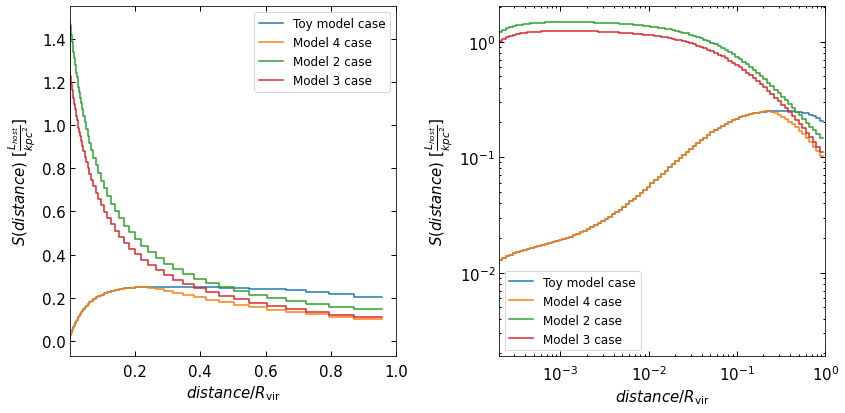

In [19]:
S_4,distance_4 = substr_surf_brightness(r=halos_4['r'],rhos0=halos_4['rhos0'],rs0=halos_4['rs0'],
                              ct0=halos_4['ct0'],mass=halos_4['m0'],weight=halos_4['weight'])

S_toy,distance_toy = substr_surf_brightness(r=halos_toy['r'],rhos0=halos_toy['rhos0'],rs0=halos_toy['rs0'],
                              ct0=halos_toy['ct0'],mass=halos_toy['m0'],weight=halos_toy['weight'])

S_2,distance_2 = substr_surf_brightness(r=halos_2['r'],rhos0=halos_2['rhos0'],rs0=halos_2['rs0'],
                              ct0=halos_2['ct0'],mass=halos_2['m0'],weight=halos_2['weight'])

S_3,distance_3 = substr_surf_brightness(r=halos_3['r'],rhos0=halos_3['rhos0'],rs0=halos_3['rs0'],
                              ct0=halos_3['ct0'],mass=halos_3['m0'],weight=halos_3['weight'])


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
for ax in (ax1,ax2):
    ax.step(distance_toy,S_toy)
    ax.step(distance_4,S_4)
    ax.step(distance_2,S_2)
    ax.step(distance_3,S_3)
    #ax.set_title("Surface brightness",fontsize=12)
    ax.legend(['Toy model case','Model 4 case','Model 2 case','Model 3 case'],fontsize=12)
    ax.set_xlabel(r'$distance /R_{\rm vir}$')
    ax.set_ylabel(r'$S(distance)$ $[\frac{L_{host}}{kpc^{2}}]$')
    ax.set_xlim(2e-4,1)

ax2.set_xscale('log')
ax2.set_yscale('log')
plt.tight_layout()
#plt.savefig('surf_bright_comp_toy_4_02.png')
plt.show()

## Creating Luminocity Templates Of Dark Matter Anihillation Signal:

In [244]:
def annihilation_lum_template(r,rhos0,rs0,ct0,mass,weight,Mhost=M0,redshift=0,logr=False,
                              N_r=1000,N_angle=10000,galactic_distance=1*Mpc,spatial = False):

    Boost,distance = annihilation_boost_factor_dist(r=r,rhos0=rhos0,rs0=rs0,rmin=rmin,N_r=N_r,
                                                    logr=logr,ct0=ct0,mass=mass,weight=weight)
    
    if spatial == True:
        spatial_factor = 1/(4*np.pi*galactic_distance**2)
        Boost = spatial_factor*Boost
    
    center_x = np.zeros((len(distance),N_angle))
    center_y = np.zeros((len(distance),N_angle))
    boost_point = np.zeros((len(distance),N_angle))
    for i in range(0,len(Boost)):
        phi=np.random.uniform(0,2*np.pi,N_angle)
        theta=np.random.uniform(0,np.pi,N_angle)
        center_x[i,:] = np.sin(theta)*np.cos(phi)*distance[i]
        center_y[i,:] = np.sin(theta)*np.sin(phi)*distance[i]
        boost_point[i,:] = Boost[i]/N_angle

    center_x = center_x.reshape(N_r*N_angle)
    center_y = center_y.reshape(N_r*N_angle)
    boost_point = boost_point.reshape(N_r*N_angle)
    bin_x = np.arange(-1.1,1.1,0.01)
    bin_y = np.arange(-1.1,1.1,0.01)
    if spatial == True:
        boost_point = np.where(boost_point > 0, boost_point, 2.8135520519064027e-40)
    else:
        boost_point = np.where(boost_point > 0, boost_point, 2.8135520519064027e-8)
    cb=plt.hist2d(center_x,center_y,weights=boost_point,bins=[bin_x, bin_y],norm=mpl.colors.LogNorm())
    cbar=plt.colorbar(cb[3], orientation='vertical')
    if spatial==False:
        cbar.set_label(r'$\log_{10}L_{sh} [L_{host}]$')
    else:
        cbar.set_label(r'$\frac{\log_{10}L_{sh}}{A} [\frac{L_{host}}{cm^{2}}]$')
    plt.xlabel(r"$\frac{distance}{R_{vir}}$")
    plt.ylabel(r"$\frac{distance}{R_{vir}}$")

    plt.tight_layout()
    #plt.savefig('subh_comp_2d_rs_2_3.png')
    plt.show()
    return cb

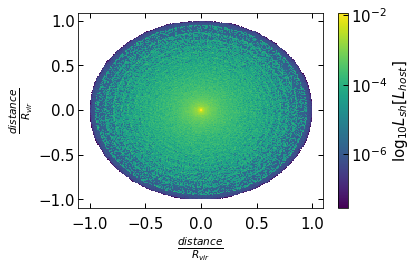

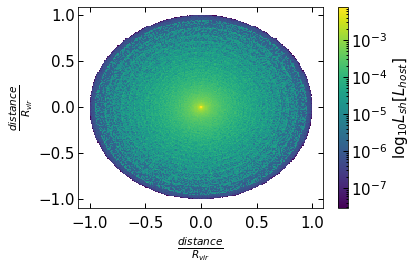

In [241]:
import matplotlib as mpl
w1 = annihilation_lum_template(r=halos_toy['r'],rhos0=halos_toy['rhos0'],rs0=halos_toy['rs0'],ct0=halos_toy['ct0'],
                          mass=halos_toy['m0'],weight=halos_toy['weight'])

w2 = annihilation_lum_template(r=halos_4['r'],rhos0=halos_4['rhos0'],rs0=halos_4['rs0'],ct0=halos_4['ct0'],
                          mass=halos_4['m0'],weight=halos_4['weight'])


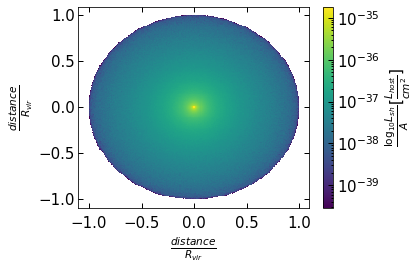

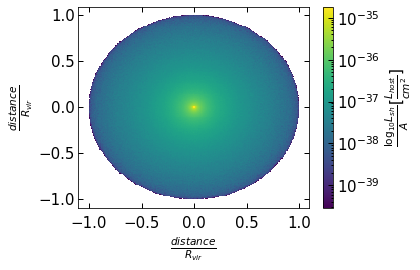

In [245]:
w1 = annihilation_lum_template(r=halos_toy['r'],rhos0=halos_toy['rhos0'],rs0=halos_toy['rs0'],ct0=halos_toy['ct0'],
                          mass=halos_toy['m0'],weight=halos_toy['weight'],spatial = True)

w2 = annihilation_lum_template(r=halos_4['r'],rhos0=halos_4['rhos0'],rs0=halos_4['rs0'],ct0=halos_4['ct0'],
                          mass=halos_4['m0'],weight=halos_4['weight'],spatial = True)

In [23]:
dif = np.zeros((w1[0].shape[0],w1[0].shape[0]))
for i in range(0,w1[0].shape[0]):
    for j in range(0,w1[0].shape[0]):
        if w1[0][i][j]==0 or w2[0][i][j]==0:
            dif[i][j] = 0
        else:
            dif[i][j] = w1[0][i][j]/w2[0][i][j]

Text(0, 0.5, '$\\frac{distance}{R_{vir}}$')

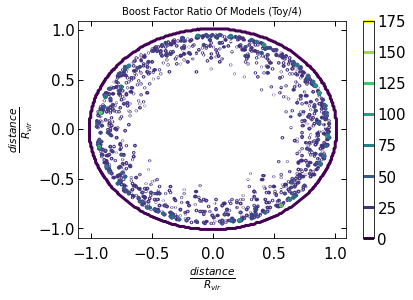

In [239]:
plt.contour(dif,extent=[w1[1].min(),w1[1].max(),w1[2].min(),w1[2].max()],linewidths=3)
plt.colorbar()
plt.title("Boost Factor Ratio Of Models (Toy/4)",fontsize=10)
plt.xlabel(r"$\frac{distance}{R_{vir}}$")
plt.ylabel(r"$\frac{distance}{R_{vir}}$")